# House Price Prediction End to End Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv('train 2.csv')
df_test= pd.read_csv('test.csv')
print("Train Data Shape: ",df_train.shape)
print("Test Data Shape: ",df_test.shape)

Train Data Shape:  (1460, 81)
Test Data Shape:  (1459, 80)


In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# to see each column and row
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [6]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Data Pre-Processing

In [7]:
# Combining train and test data into 1
# concatination of data
df = pd.concat([df_train, df_test])
df.shape

(2919, 81)

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [9]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [11]:
df = df.set_index("Id")

In [12]:
# set of integer features

int_feature = df.select_dtypes(include=['int64']).columns
print("Int Feature Size: ", int_feature.shape[0])
print("Int Feature Names: ", int_feature.tolist())
type(int_feature)

Int Feature Size:  25
Int Feature Names:  ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


pandas.core.indexes.base.Index

In [13]:
# set of float features

float_feature = df.select_dtypes(include=['float64']).columns
print("Float Feature Size: ",float_feature.shape[0])
print("Float Features Name: ",float_feature.tolist())

Float Feature Size:  12
Float Features Name:  ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [14]:
# set of categorical features

categorical_feature = df.select_dtypes(include=['object']).columns
print("Categorical Feature Size: ",categorical_feature.shape[0])
print("Categorical Features Name: ",categorical_feature.tolist())

Categorical Feature Size:  43
Categorical Features Name:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [15]:
# Statistical Insignts
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### Handling Missing Value

<Axes: ylabel='Id'>

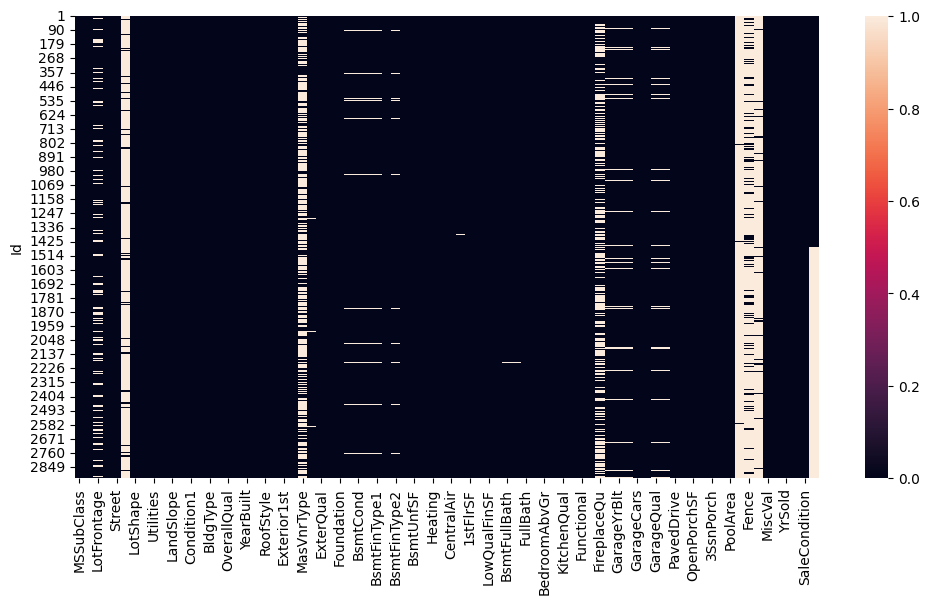

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

In [17]:
null_count = df.isnull().sum()
null_count

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

In [18]:
# null values in feature percentage calculation

null_percentage = df.isnull().sum()/df.shape[0]*100 # null values rows total / total rows * 100
null_percentage

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
Length: 80, dtype: float64

In [19]:
# If the null values in a perticular feature will be more than 50% we will deleate that feature -> threshold > 50%
a = null_percentage > 50 # returns true and false for each feature
threshold_features = null_percentage[null_percentage>50]    # returns columns with true condition 
print(threshold_features)
print(threshold_features.keys())

Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64
Index(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


But these values aren't null values they hold meaning as menthioned in the data description file

Hence there is no feature that need's to be dropped

### Imputing Missing values

In [20]:
missing_value_feat = null_percentage[null_percentage>0]
print("Total missing values: ",len(missing_value_feat))

Total missing values:  35


 we will handle only Int and Float null values because Object Null values doesn't mean value is unknow

In [21]:
# This will give us categorical features with NA value
cat_na_feature = missing_value_feat[missing_value_feat.keys().isin(categorical_feature)]
print("categorical NA values: ", len(cat_na_feature))
cat_na_feature

categorical NA values:  23


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [22]:
# This will give us int features with missing value

int_na_feature = missing_value_feat[missing_value_feat.keys().isin(int_feature)]
print("Integer missing values: ", len(int_na_feature))

Integer missing values:  0


In [23]:
# This will give us float features with missing value

float_na_feature = missing_value_feat[missing_value_feat.keys().isin(float_feature)]
print("Float missing values: ",len(float_na_feature))
float_na_feature

Float missing values:  12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

### Categorical feature

Handling MSZoning feature's missing value

In [24]:
df["MSZoning"].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

<Axes: xlabel='MSZoning', ylabel='count'>

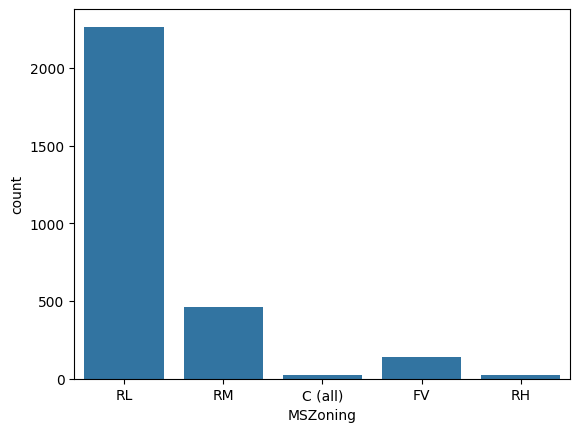

In [26]:
sns.countplot(x=df["MSZoning"])

In [ ]:
df_mvi = df.copy()

In [ ]:
# In categorical feature we impute mode value instead of missing value

mszoning_mode=df['MSZoning'].mode()[0]
df_mvi['MSZoning'].replace(np.nan, mszoning_mode, inplace=True)
df_mvi["MSZoning"].isnull().sum()

0

In [ ]:
def compareCountPlot(dfOld, dfNew, feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title("Old Graph")
    sns.countplot(x=df[feature])
    plt.subplot(1,2,2)
    plt.title("New Graph")
    sns.countplot(x=dfNew[feature])

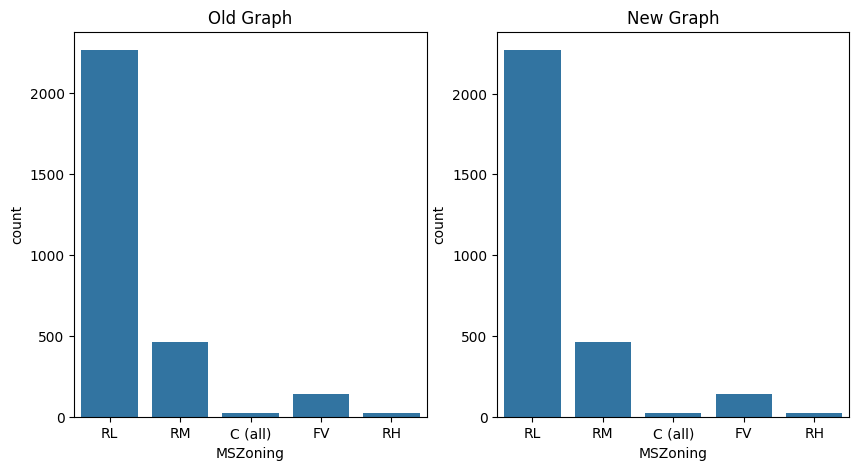

In [ ]:
compareCountPlot(df,df_mvi, 'MSZoning')

Handling Alley feature's missing value

In [ ]:
alley_const = "NA"
df_mvi['Alley'].replace(np.nan, alley_const, inplace = True)
df_mvi['Alley'].isnull().sum()

0

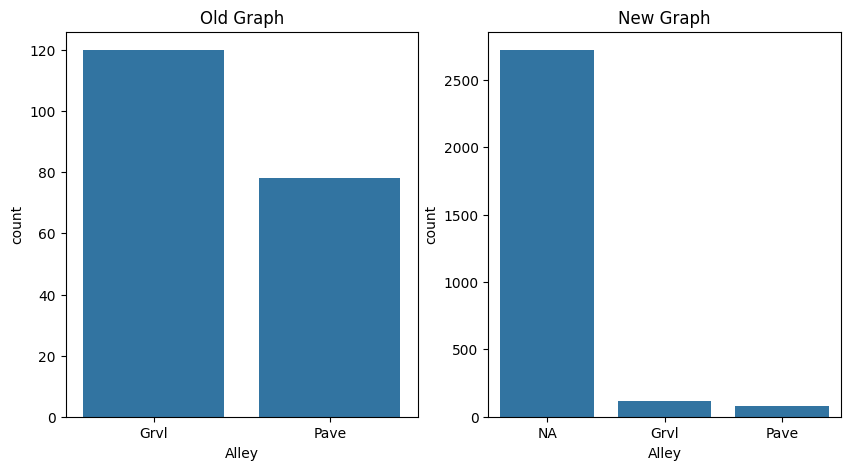

In [ ]:
compareCountPlot(df,df_mvi, 'Alley')

Handling Utilities feature's missing value

In [ ]:
df['Utilities'].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [ ]:
utilities_mode = df['Utilities'].mode()[0]
df_mvi['Utilities'].replace(np.nan, utilities_mode, inplace = True)
df_mvi['Utilities'].isnull().sum()

0

Handling Exterior1 & Exterior2 feature's missing value

In [ ]:
exterior1_mode = df['Exterior1st'].mode()[0]
df_mvi['Exterior1st'].replace(np.nan, exterior1_mode, inplace=True)
exterior2_mode = df['Exterior2nd'].mode()[0]
df_mvi['Exterior2nd'].replace(np.nan, exterior2_mode, inplace=True)
print("E1 : ",df_mvi['Exterior1st'].isnull().sum())
print("E2 : ",df_mvi['Exterior2nd'].isnull().sum())

E1 :  0
E2 :  0


Handling MasVnrType & MasVnrArea feature's missing value

In [ ]:
MasVnrType_mode = df['MasVnrType'].mode()[0]
df_mvi['MasVnrType'].replace(np.nan, MasVnrType_mode, inplace=True)
df_mvi['MasVnrType'].isnull().sum()

0

In [ ]:
MasVnrArea_mode = 0
df_mvi['MasVnrArea'].replace(np.nan, MasVnrArea_mode, inplace=True)
df_mvi['MasVnrArea'].isnull().sum()

0

Handling Bsmt feature's missing value

<Axes: ylabel='Id'>

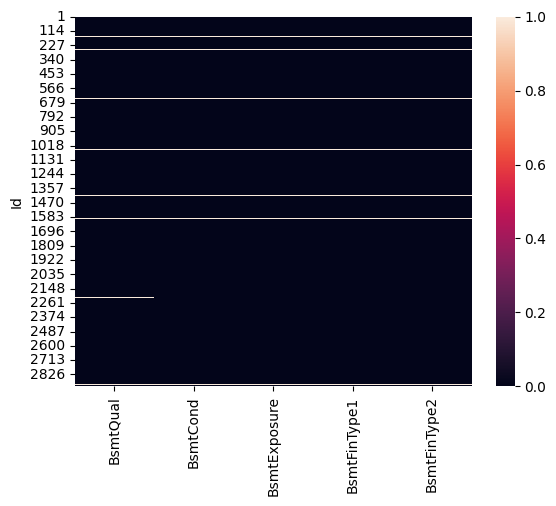

In [ ]:
category_bsmt_feat = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
sns.heatmap(df[category_bsmt_feat].isnull())


In [ ]:
for i in category_bsmt_feat:
    print(f"Value Count of {i} : {df[i].value_counts()}")

Value Count of BsmtQual : BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
Value Count of BsmtCond : BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
Value Count of BsmtExposure : BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
Value Count of BsmtFinType1 : BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
Value Count of BsmtFinType2 : BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


In [ ]:
bsmt_na = "NA"
for i in category_bsmt_feat:
    df_mvi[i].replace(np.nan, bsmt_na, inplace = True)
    print(f"{i} : ",df_mvi[i].isnull().sum())

BsmtQual :  0
BsmtCond :  0
BsmtExposure :  0
BsmtFinType1 :  0
BsmtFinType2 :  0


In [ ]:
df['Functional'].value_counts()

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [ ]:
function_mode = df['Functional'].mode()[0]
df_mvi['Functional'].replace(np.nan, function_mode, inplace = True)
df_mvi['Functional'].isnull().sum()

0

In [ ]:
df['SaleType'].value_counts()

SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

In [ ]:
saletype_mode = df['SaleType'].mode()[0]
df_mvi['SaleType'].replace(np.nan, saletype_mode, inplace = True)
df_mvi['SaleType'].isnull().sum()

0

In [ ]:
remain_cat_feat =["FireplaceQu", "PoolQC", "Fence", "MiscFeature"]
other_mode = 'NA'
for i in remain_cat_feat:
    df_mvi[i].replace(np.nan, other_mode, inplace=True)
    print(df_mvi[i].isnull().sum())


0
0
0
0


In [ ]:
garage_cat=["GarageType", "GarageFinish", "GarageQual", "GarageCond"]      
garage_mode = 'NA'
for i in garage_cat:
    df_mvi[i].replace(np.nan, garage_mode, inplace=True)
    print(df_mvi[i].isnull().sum())

0
0
0
0


### Float Missing Values

Handling LotFrontage feature's missing value

We will replace Null value with mean or median

In [ ]:
# Function to see the distribution of the feature 

def boxdist(df):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title("Box Plot")
    sns.boxplot(x=df)
    plt.subplot(1,2,2)
    plt.title("DistPlot")
    sns.distplot(x=df, kde = True)

/var/folders/rq/r_ft24217fz3fhtg64fs6l7c0000gn/T/ipykernel_13952/2456860723.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df, kde = True)


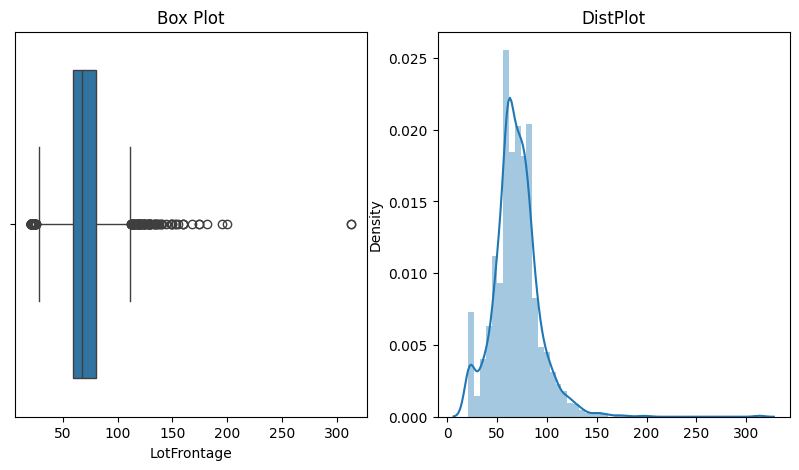

In [ ]:
boxdist(df['LotFrontage'])

In [ ]:
lotfrontage_median = df['LotFrontage'].median()
df_mvi['LotFrontage'].replace(np.nan, lotfrontage_median, inplace = True)
df_mvi['LotFrontage'].isnull().sum()

0

In [ ]:
# function to compare the distribution of feature with new and old data

def compareBoxDist(df, df_mvi, feature):
    plt.figure(figsize=(10, 7))
    plt.subplot(2,2,1)
    plt.title("Old Distribution")
    sns.boxplot(x=df[feature])
    plt.subplot(2,2,2)
    plt.title("Old Distribution")
    sns.distplot(df[feature])
    plt.subplot(2,2,3)
    plt.title("New Distribution")
    sns.boxplot(x=df_mvi[feature])
    plt.subplot(2,2,4)
    plt.title("New Distribution")
    sns.distplot(df_mvi[feature])

/var/folders/rq/r_ft24217fz3fhtg64fs6l7c0000gn/T/ipykernel_13952/2070408562.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])
/var/folders/rq/r_ft24217fz3fhtg64fs6l7c0000gn/T/ipykernel_13952/2070408562.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_mvi[feature])


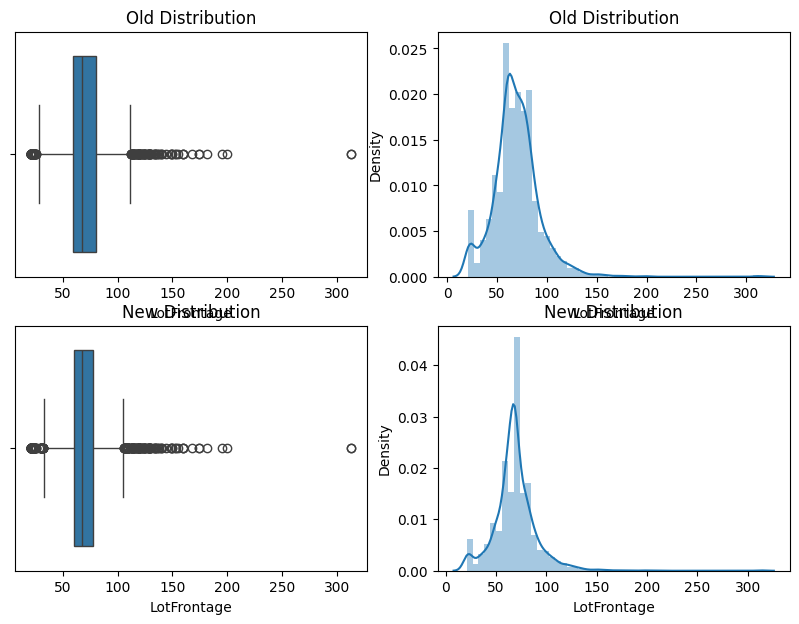

In [ ]:
compareBoxDist(df, df_mvi, 'LotFrontage')

In [ ]:
float_bsmt_feat = ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"]

<Axes: ylabel='Id'>

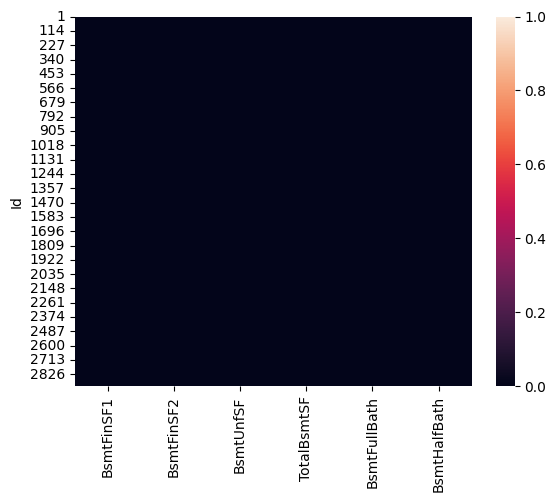

In [ ]:
sns.heatmap(df[float_bsmt_feat].isnull())

# heatmap shows no missing values but they are present 

In [ ]:
df_bsmt = df[category_bsmt_feat + float_bsmt_feat]
df_bsmt[df_bsmt.isnull().any(axis=1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
18,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
91,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
103,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
157,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2804,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2805,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2825,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
bsmt_float = 0.00

for i in float_bsmt_feat:
    df_mvi[i].replace(np.nan, bsmt_float, inplace=True)

df_mvi[float_bsmt_feat].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

In [ ]:
df[["Electrical", "KitchenQual", "KitchenAbvGr"]][df[["Electrical", "KitchenQual", "KitchenAbvGr"]].isnull().any(axis=1)]

,Electrical,KitchenQual,KitchenAbvGr
Id,,,
1380,NaN,Gd,1
1556,SBrkr,NaN,1


In [ ]:
df_ek = df[['Electrical', 'KitchenQual', 'KitchenAbvGr']]
df_ek[df_ek.isnull().any(axis=1)]

,Electrical,KitchenQual,KitchenAbvGr
Id,,,
1380,NaN,Gd,1
1556,SBrkr,NaN,1


In [ ]:
electrical_mode = df["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan, electrical_mode, inplace=True)
df_mvi["Electrical"].isnull().sum()

0

In [ ]:
KitchenQual_mode = df["KitchenQual"].mode()[0]
df_mvi["KitchenQual"].replace(np.nan, KitchenQual_mode, inplace=True)
df_mvi["KitchenQual"].isnull().sum()

0

In [ ]:
garage_float = ['GarageYrBlt', 'GarageCars', 'GarageArea']
garage_float_mode = 0.00

for i in garage_float:
    df_mvi[i].replace(np.nan, garage_float_mode, inplace=True)
df_mvi[garage_float].isnull().sum()


GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

## Feature Transformation

Converting Numeric feature to categorical feature

In [ ]:
num_to_cat = ["MSSubClass", "YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]
for feat in num_to_cat:
    print(f"{feat} : {df[feat].dtype}")
    df_mvi[feat]=df_mvi[feat].astype(str)
df_mvi[num_to_cat].dtypes

MSSubClass : int64
YearBuilt : int64
YearRemodAdd : int64
GarageYrBlt : float64
YrSold : int64


MSSubClass      object
YearBuilt       object
YearRemodAdd    object
GarageYrBlt     object
YrSold          object
dtype: object

In [ ]:
import calendar

df_mvi['MoSold']=df_mvi["MoSold"].apply(lambda x:calendar.month_abbr[x])
df_mvi['MoSold']


Id
1       Feb
2       May
3       Sep
4       Feb
5       Dec
       ... 
2915    Jun
2916    Apr
2917    Sep
2918    Jul
2919    Nov
Name: MoSold, Length: 2919, dtype: object

Converting categorical to numberic feature

Ordinal Encoding

In [ ]:
from pandas.api.types import CategoricalDtype

In [ ]:
df_mvi['BsmtCond'] = df['BsmtCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['BsmtFinType1'] = df['BsmtFinType1'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_mvi['BsmtFinType2'] = df['BsmtFinType2'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_mvi["BsmtExposure"] = df["BsmtExposure"].astype(CategoricalDtype(categories=['NA', 'No', 'Mn', 'Av', 'Gd'], ordered=True)).cat.codes
df_mvi['BsmtQual'] = df['BsmtQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['ExterQual'] = df['ExterQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['ExterCond'] = df['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['Functional'] = df['Functional'].astype(CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod','Min2','Min1', 'Typ'], ordered = True)).cat.codes
df_mvi['GarageCond'] = df['GarageCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['GarageQual'] = df['GarageQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['GarageFinish'] = df['GarageFinish'].astype(CategoricalDtype(categories=['NA', 'Unf', 'RFn', 'Fin'], ordered = True)).cat.codes
df_mvi['FireplaceQu'] = df['FireplaceQu'].astype(CategoricalDtype(categories=['Na', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
df_mvi['PoolQC'] = df['PoolQC'].astype(CategoricalDtype(categories=['NA', 'Fa', 'TA', 'Gd', 'Ex'], ordered=True)).cat.codes
df_mvi['HeatingQC'] = df['HeatingQC'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['KitchenQual'] = df['KitchenQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['PavedDrive'] = df['PavedDrive'].astype(CategoricalDtype(categories=['N', 'P', 'Y'], ordered = True)).cat.codes
df_mvi['Utilities'] = df['Utilities'].astype(CategoricalDtype(categories=['ELO', 'NASeWa', 'NASeWr', 'AllPub'], ordered = True)).cat.codes

In [ ]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

One-Hot Encoding

In [ ]:
df_encode = df_mvi.copy()

In [ ]:
object_features = df_encode.select_dtypes(include="object").columns.tolist()
print(len(object_features))

32


In [ ]:
print("shape: ", df_encode.shape)
df_encode = pd.get_dummies(df_encode, columns=object_features, drop_first=True, prefix=object_features)
print("shpae: ", df_encode.shape)

shape:  (2919, 80)
shpae:  (2919, 512)


In [ ]:
bol_to_int = df_encode.select_dtypes(include='boolean').columns.tolist()

df[bol_to_int]=df[bol_to_int].astype(int)

### Split train test data

In [ ]:
df_encode.shape

(2919, 512)

In [ ]:
len_train = df_train.shape[0]
len_train

1460

In [ ]:
X_train = df_encode[:len_train].drop("SalePrice", axis=1)
y_train = df_encode['SalePrice'][:len_train]

X_test = df_encode[len_train:].drop("SalePrice", axis =1)

X_train[0:3]

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,3,7,5,196.0,3,2,4,3,...,0,0,0,0,1,0,0,0,1,0
2,80.0,9600,3,6,8,0.0,2,2,4,3,...,0,0,0,0,1,0,0,0,1,0
3,68.0,11250,3,7,5,162.0,3,2,4,3,...,0,0,0,0,1,0,0,0,1,0


## Feature Scaling 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc =StandardScaler()

z = (x - u)/s

In [ ]:
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train[0:3]

array([[-0.21271975, -0.20714171,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.46815755, -0.09188637,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.07654429,  0.07347998,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

### Training the Model

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.neural_network import MLPRegressor

from xgboost import XGBRegressor

In [ ]:
svr = SVR()
lr = LinearRegression()
sgdr = SGDRegressor()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
xgbr = XGBRegressor()
mlpr = MLPRegressor()


In [ ]:
models = {
    "a" : ['LinearRegression', lr],
    "b" : ["SVR", svr],
    "c" : ["SGDRegressor", sgdr],
    "d" : ["KNeighborsRegressor", knr],
    "e" : ["GassianProcessRegressor", gpr],
    "f" : ["DecisionTreeRegressor", dtr],
    "h" : ["RandomForestRegressor", rfr],
    "i" : ["XGBRegressor", xgbr],
    "j" : ["MLPRegressor", mlpr],
}

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, r2_score

def test_mode(model, X_train = X_train, y_train = y_train):

    cv = KFold(n_splits= 7, shuffle=True, random_state=45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=r2)
    score = [r2_val_score.mean()]
    return score

In [ ]:
model_score =[]
for model in models:
    print("Training Model : ", models[model][0])
    score = test_mode(models[model][1], X_train, y_train)
    print("Score of the model : ",score)
    model_score.append([models[model][0], score[0]])

Training Model :  LinearRegression
Score of the model :  [-3.930124059912763e+25]
Training Model :  SVR
Score of the model :  [-0.05213873772439759]
Training Model :  SGDRegressor
Score of the model :  [-1277.0466122077064]
Training Model :  KNeighborsRegressor
Score of the model :  [0.5549355281479554]
Training Model :  GassianProcessRegressor
Score of the model :  [-5.3986443353742075]
Training Model :  DecisionTreeRegressor
Score of the model :  [0.657267724311274]
Training Model :  GradientBoostingRegressor
Score of the model :  [0.8703746406552929]
Training Model :  RandomForestRegressor
Score of the model :  [0.8438063705075676]
Training Model :  XGBRegressor
Score of the model :  [0.8608858607692882]
Training Model :  MLPRegressor


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

Score of the model :  [-4.823858780422973]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
model_score

[['LinearRegression', -3.930124059912763e+25],
 ['SVR', -0.05213873772439759],
 ['SGDRegressor', -1277.0466122077064],
 ['KNeighborsRegressor', 0.5549355281479554],
 ['GassianProcessRegressor', -5.3986443353742075],
 ['DecisionTreeRegressor', 0.657267724311274],
 ['GradientBoostingRegressor', 0.8703746406552929],
 ['RandomForestRegressor', 0.8438063705075676],
 ['XGBRegressor', 0.8608858607692882],
 ['MLPRegressor', -4.823858780422973]]